# Treeview

`ttk.Treview` is a class that is used to display data in a hierarchical or tabular form. This page focuses on the properties of the tree view.

See more detailed description on the [official documentation section](https://docs.python.org/3/library/tkinter.ttk.html#treeview).

In [1]:
import os
from pathlib import Path
os.chdir(str(Path(os.getcwd()).parent.parent))

import tkinter as tk
from tkinter import ttk

from tkinter_files.screenshot import take_screenshot

## Select element

Sometimes you'll need to create a feature that allows you to display a particular value in the treeview. Key methods here are

- `selection_set` select specific item.
- `see` scroll values to such position to see specified element.

Here is an example that builds a simple application that allows to find elements with a certain index.

In [20]:
root = tk.Tk()
root.geometry("200x300")

tree = ttk.Treeview(root, columns=("ind"), show='headings')
tree.pack()

entry = tk.Entry(root)
entry.pack()
button = tk.Button(root, text="Go to item")
button.pack()

for i in range(100):
    tree.insert(
        parent="",
        index="end",
        values=f"value\ {str(i)}",
        iid=i
    )

def go_to_obs(event):
    value = entry.get()
    # This is key part - here is called `selection_set` and `see`
    tree.selection_set(value)
    tree.see(value)

button.bind("<Button-1>", go_to_obs)

root.mainloop()

You have to specify `iid` in `see` and `selection_set` methods. The following example illustrates this:

We have two items where:

- `selection 1` corresponds to the `tiger` value.
- `selection 2` corresponds to the `girafe` value.

After creating ayout we called `selection_set("selection 2")`.

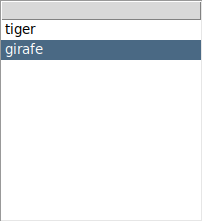

In [28]:
root = tk.Tk()

tree = ttk.Treeview(root, columns=("ind"), show='headings')
tree.pack()
tree.insert(
    parent="", index="end", values="tiger", iid="selection 1"
)
tree.insert(
    parent="", index="end", values="girafe", iid="selection 2"
)

tree.selection_set("selection 2")

root.after(200, take_screenshot, root)
root.mainloop()

As a result we have selected the `girafe` element which corresponds to the `iid=selection 2`.